# Homicide Prediction
Jason Yeoh

### (1) Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Model building libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

warnings.filterwarnings('ignore')

### (2) Load datasets
Load the following datasets:
- **Socioeconomic** indicators (primary)
- **Women Empowerment** indicators (secondary 1)
- **Educational** indicators (secondary 2)

In [2]:
primary = pd.read_csv('final_primary.csv')
secondary1 = pd.read_csv('final_secondary1.csv')
secondary2 = pd.read_csv('final_secondary2.csv')

### (3) Descriptive Statistics

In [3]:
print('Size of primary data: {}'.format(primary.shape))
print('Size of secondary1 data: {}'.format(secondary1.shape))
print('Size of secondary2 data: {}'.format(secondary2.shape))

Size of primary data: (196, 11)
Size of secondary1 data: (116, 6)
Size of secondary2 data: (196, 9)


#### SOCIOECONOMIC DATA (196 entries, 11 attributes)
The primary data consists of the following attributes:
- **poverty_gap**: The poverty gap index is the mean shortfall in income or consumption from the International Poverty Line ($1.90) counting the non-poor as having zero shortfall, expressed as a percentage of the poverty line.
- **public_health_exp**: Public health expenditure includes: recurrent and capital spending (central and local
levels), external borrowing and grants (including donations from international
agencies and NGOs), and social or compulsory insurance funds
- **malnutrition_death_rates**: Protein-energy malnutrition (PEM) death rate, measured per 100,000 individuals
- **infant_mortality_rate**: The share of newborns who die before reaching one year of age.
- **GDP_per_capita**
- **annual_health_exp**
- **homicide_rate**: Homicides per 100,000 people

In [4]:
primary.head()

,Unnamed: 0,Country,Country_Code,Year,poverty_gap,public_health_exp,malnutrition_death_rates,Infant_mortality_rate,GDP_per_capita,annual_health_care_per_capita,homicide_Rate
0,1,Afghanistan,AFG,2012,61504781.25,2.920566,3.390730,6.09,1839.273579,160.368027,11.445933
1,2,Albania,ALB,2012,4424530.00,2.735704,0.167334,0.95,10369.823380,544.006172,2.481095
2,3,Algeria,DZA,2012,61504781.25,4.520251,0.298914,2.24,13161.961670,821.338885,1.229986
3,4,American Samoa,ASM,2012,61504781.25,3.325882,5.616784,1.70,10404.224090,636.353009,5.083770
4,6,Andorra,AND,2012,61504781.25,5.747040,0.083869,0.37,10404.224090,3426.500209,0.755515


#### WOMEN EMPOWERMENT DATA (116 entries, 6 attributes)
- **youth_literacy_female**
- **women_in_parliaments**
- **firms_with_female_top_manager**

In [5]:
secondary1.head()

,Code,youth_literacy_female,Women_in_parlements,Firms_with_female_top_manager,Year,Entity
0,AFG,11.142800,27.7,0.7,2012,Afghanistan
1,AGO,63.182121,34.1,13.5,2012,Angola
2,ALB,99.020187,15.7,11.7,2012,Albania
3,ARG,97.302483,37.4,9.2,2012,Argentina
4,ARM,99.910568,10.7,13.5,2012,Armenia


In [6]:
secondary2.head()

,Unnamed: 0,Code,homicide_rate,gov_expen,gross_enrol_secondary,Year,gross_enrol_primary,Country,lower_secondary
0,2,AFG,11.445933,2.524410,56.677341,2012,108.928520,Afghanistan,73.914095
1,3,AGO,3.694127,4.522714,80.807995,2012,103.133186,Angola,73.914095
2,4,ALB,2.481095,4.522714,92.741470,2012,104.784393,Albania,94.165283
3,5,AND,0.755515,4.522714,80.807995,2012,103.133186,Andorra,73.914095
4,6,ARE,1.234601,4.522714,80.807995,2012,101.423203,United Arab Emirates,73.914095


In [7]:
# Drop unnecessary columns
primary = primary.drop(columns=['Unnamed: 0', 'Year'])
secondary1 = secondary1.drop(columns=['Year'])
secondary2 = secondary2.drop(columns=['Unnamed: 0', 'Year', 'homicide_rate'])

In [8]:
# Rename columns for uniformity
primary.columns = ['country', 'code', 'poverty_gap', 'public_health_exp', 'malnutrition_death_rates', 'infant_mortality_rates', 'gdp_per_capita', 'annual_health_per_capita', 'homicide_rate']
secondary1.columns = ['code', 'youth_female_literacy', 'women_in_parliaments', 'firms_w_female_top_manager', 'country']
secondary2.columns = ['code', 'gov_expenditure', 'gross_enrol_secondary', 'gross_enrol_primary', 'country', 'lower_secondary']

secondary1 = secondary1[['country', 'code', 'youth_female_literacy', 'women_in_parliaments', 'firms_w_female_top_manager']]
secondary2 = secondary2[['country', 'code', 'gov_expenditure', 'gross_enrol_secondary', 'gross_enrol_primary', 'lower_secondary']]

#### MERGE PRIMARY & SECONDARY DATA

In [9]:
df = secondary2.merge(secondary1, on='country', how='left')
df = df.merge(primary, on='country', how='left')
df = df.drop(columns=['code_x', 'code_y', 'code', 'country'])
df

,gov_expenditure,gross_enrol_secondary,gross_enrol_primary,lower_secondary,youth_female_literacy,women_in_parliaments,firms_w_female_top_manager,poverty_gap,public_health_exp,malnutrition_death_rates,infant_mortality_rates,gdp_per_capita,annual_health_per_capita,homicide_rate
0,2.524410,56.677341,108.928520,73.914095,11.142800,27.7,0.7,6.150478e+07,2.920566,3.390730,6.09,1839.273579,160.368027,11.445933
1,4.522714,80.807995,103.133186,73.914095,63.182121,34.1,13.5,1.463403e+09,2.137317,23.724062,6.78,5999.902106,223.244529,3.694127
2,4.522714,92.741470,104.784393,94.165283,99.020187,15.7,11.7,4.424530e+06,2.735704,0.167334,0.95,10369.823380,544.006172,2.481095
3,4.522714,80.807995,103.133186,73.914095,NaN,NaN,NaN,6.150478e+07,5.747040,0.083869,0.37,10404.224090,3426.500209,0.755515
4,4.522714,80.807995,101.423203,73.914095,NaN,NaN,NaN,6.150478e+07,2.550026,0.164936,0.70,59419.089490,1993.590901,1.234601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,4.522714,85.710449,105.154022,102.420273,NaN,NaN,NaN,1.581180e+05,4.337641,4.217218,1.57,5644.292861,288.651931,3.153496
192,4.522714,46.236141,94.425034,48.168919,35.377731,0.3,0.1,6.150478e+07,1.571628,2.472157,4.32,3793.412118,210.641309,3.060375
193,6.371640,91.957733,97.629761,73.914095,NaN,NaN,NaN,1.750222e+09,4.276294,5.103114,3.61,12215.251870,1097.427426,30.902638
194,4.522714,80.807995,109.210648,55.349079,65.524368,11.5,23.8,3.019621e+09,2.536370,21.404929,4.96,3509.413319,175.092575,6.202861


#### WORKING ON MISSING VALUES
Perform a kNN imputation for null values.

In [10]:
# Check for null values
df.isnull().sum()

gov_expenditure                0
gross_enrol_secondary          0
gross_enrol_primary            0
lower_secondary                0
youth_female_literacy         80
women_in_parliaments          80
firms_w_female_top_manager    80
poverty_gap                    0
public_health_exp              0
malnutrition_death_rates       0
infant_mortality_rates         0
gdp_per_capita                 0
annual_health_per_capita       0
homicide_rate                  0
dtype: int64

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_df = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed_df, columns=df.columns)
imputed_df.head(3)

,gov_expenditure,gross_enrol_secondary,gross_enrol_primary,lower_secondary,youth_female_literacy,women_in_parliaments,firms_w_female_top_manager,poverty_gap,public_health_exp,malnutrition_death_rates,infant_mortality_rates,gdp_per_capita,annual_health_per_capita,homicide_rate
0,2.524410,56.677341,108.928520,73.914095,11.142800,27.7,0.7,6.150478e+07,2.920566,3.390730,6.09,1839.273579,160.368027,11.445933
1,4.522714,80.807995,103.133186,73.914095,63.182121,34.1,13.5,1.463403e+09,2.137317,23.724062,6.78,5999.902106,223.244529,3.694127
2,4.522714,92.741470,104.784393,94.165283,99.020187,15.7,11.7,4.424530e+06,2.735704,0.167334,0.95,10369.823380,544.006172,2.481095


### (4) Feature Extraction
#### Principal Component Analysis


In [91]:
from sklearn.decomposition import PCA

X = imputed_df.iloc[:,:-1] ## independent features
y = imputed_df.iloc[:,-1] ## dependent features

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,PC1,PC2,homicide_rate
0,-1.778110e+09,-15149.053230,11.445933
1,-3.762117e+08,-10883.796488,3.694127
2,-1.835190e+09,-6615.141566,2.481095
3,-1.778110e+09,-6404.513956,0.755515
4,-1.778110e+09,42437.647332,1.234601
...,...,...,...
191,-1.839456e+09,-11347.818377,3.153496
192,-1.778110e+09,-13195.396990,3.060375
193,-8.939260e+07,-4605.229348,30.902638
194,1.180006e+09,-13252.564515,6.202861


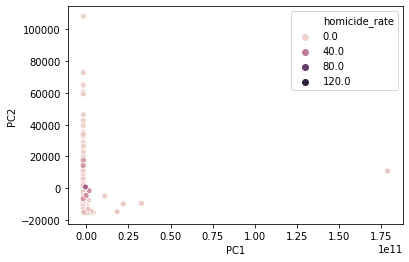

In [102]:
sns.scatterplot(x='PC1', y='PC2', hue='homicide_rate', data=finalDf)

In [90]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.93554751e-12, 4.96179819e-15])

### (4) EDA

#### CORRELATION PLOT
We could see that **GDP per capita and infant mortality rate**

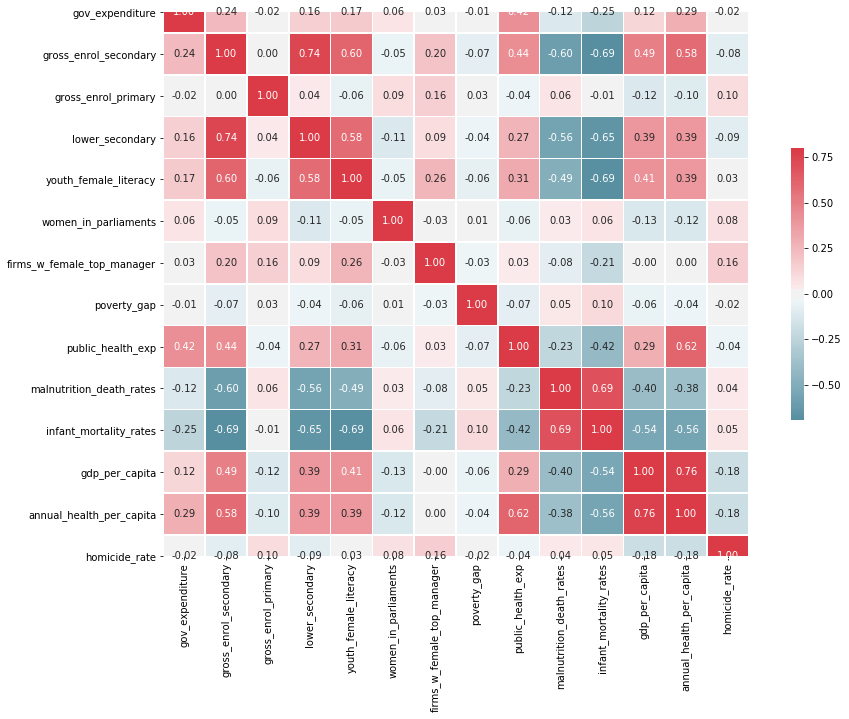

In [126]:
def correlation_heatmap(data):
    fig, ax = plt.subplots(figsize=(15,10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(data.corr(), cmap=cmap, vmax=.8, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
    plt.show();
    
correlation_heatmap(imputed_df)

In [79]:
corrs = imputed_df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
corrs[corrs > 0.5]

homicide_rate             homicide_rate               1.000000
annual_health_per_capita  gdp_per_capita              0.761413
lower_secondary           gross_enrol_secondary       0.744658
gross_enrol_secondary     infant_mortality_rates      0.692879
malnutrition_death_rates  infant_mortality_rates      0.691949
infant_mortality_rates    youth_female_literacy       0.686030
lower_secondary           infant_mortality_rates      0.646885
public_health_exp         annual_health_per_capita    0.616443
gross_enrol_secondary     youth_female_literacy       0.602255
                          malnutrition_death_rates    0.599346
lower_secondary           youth_female_literacy       0.578947
annual_health_per_capita  gross_enrol_secondary       0.578609
lower_secondary           malnutrition_death_rates    0.558825
infant_mortality_rates    annual_health_per_capita    0.558079
gdp_per_capita            infant_mortality_rates      0.538235
dtype: float64

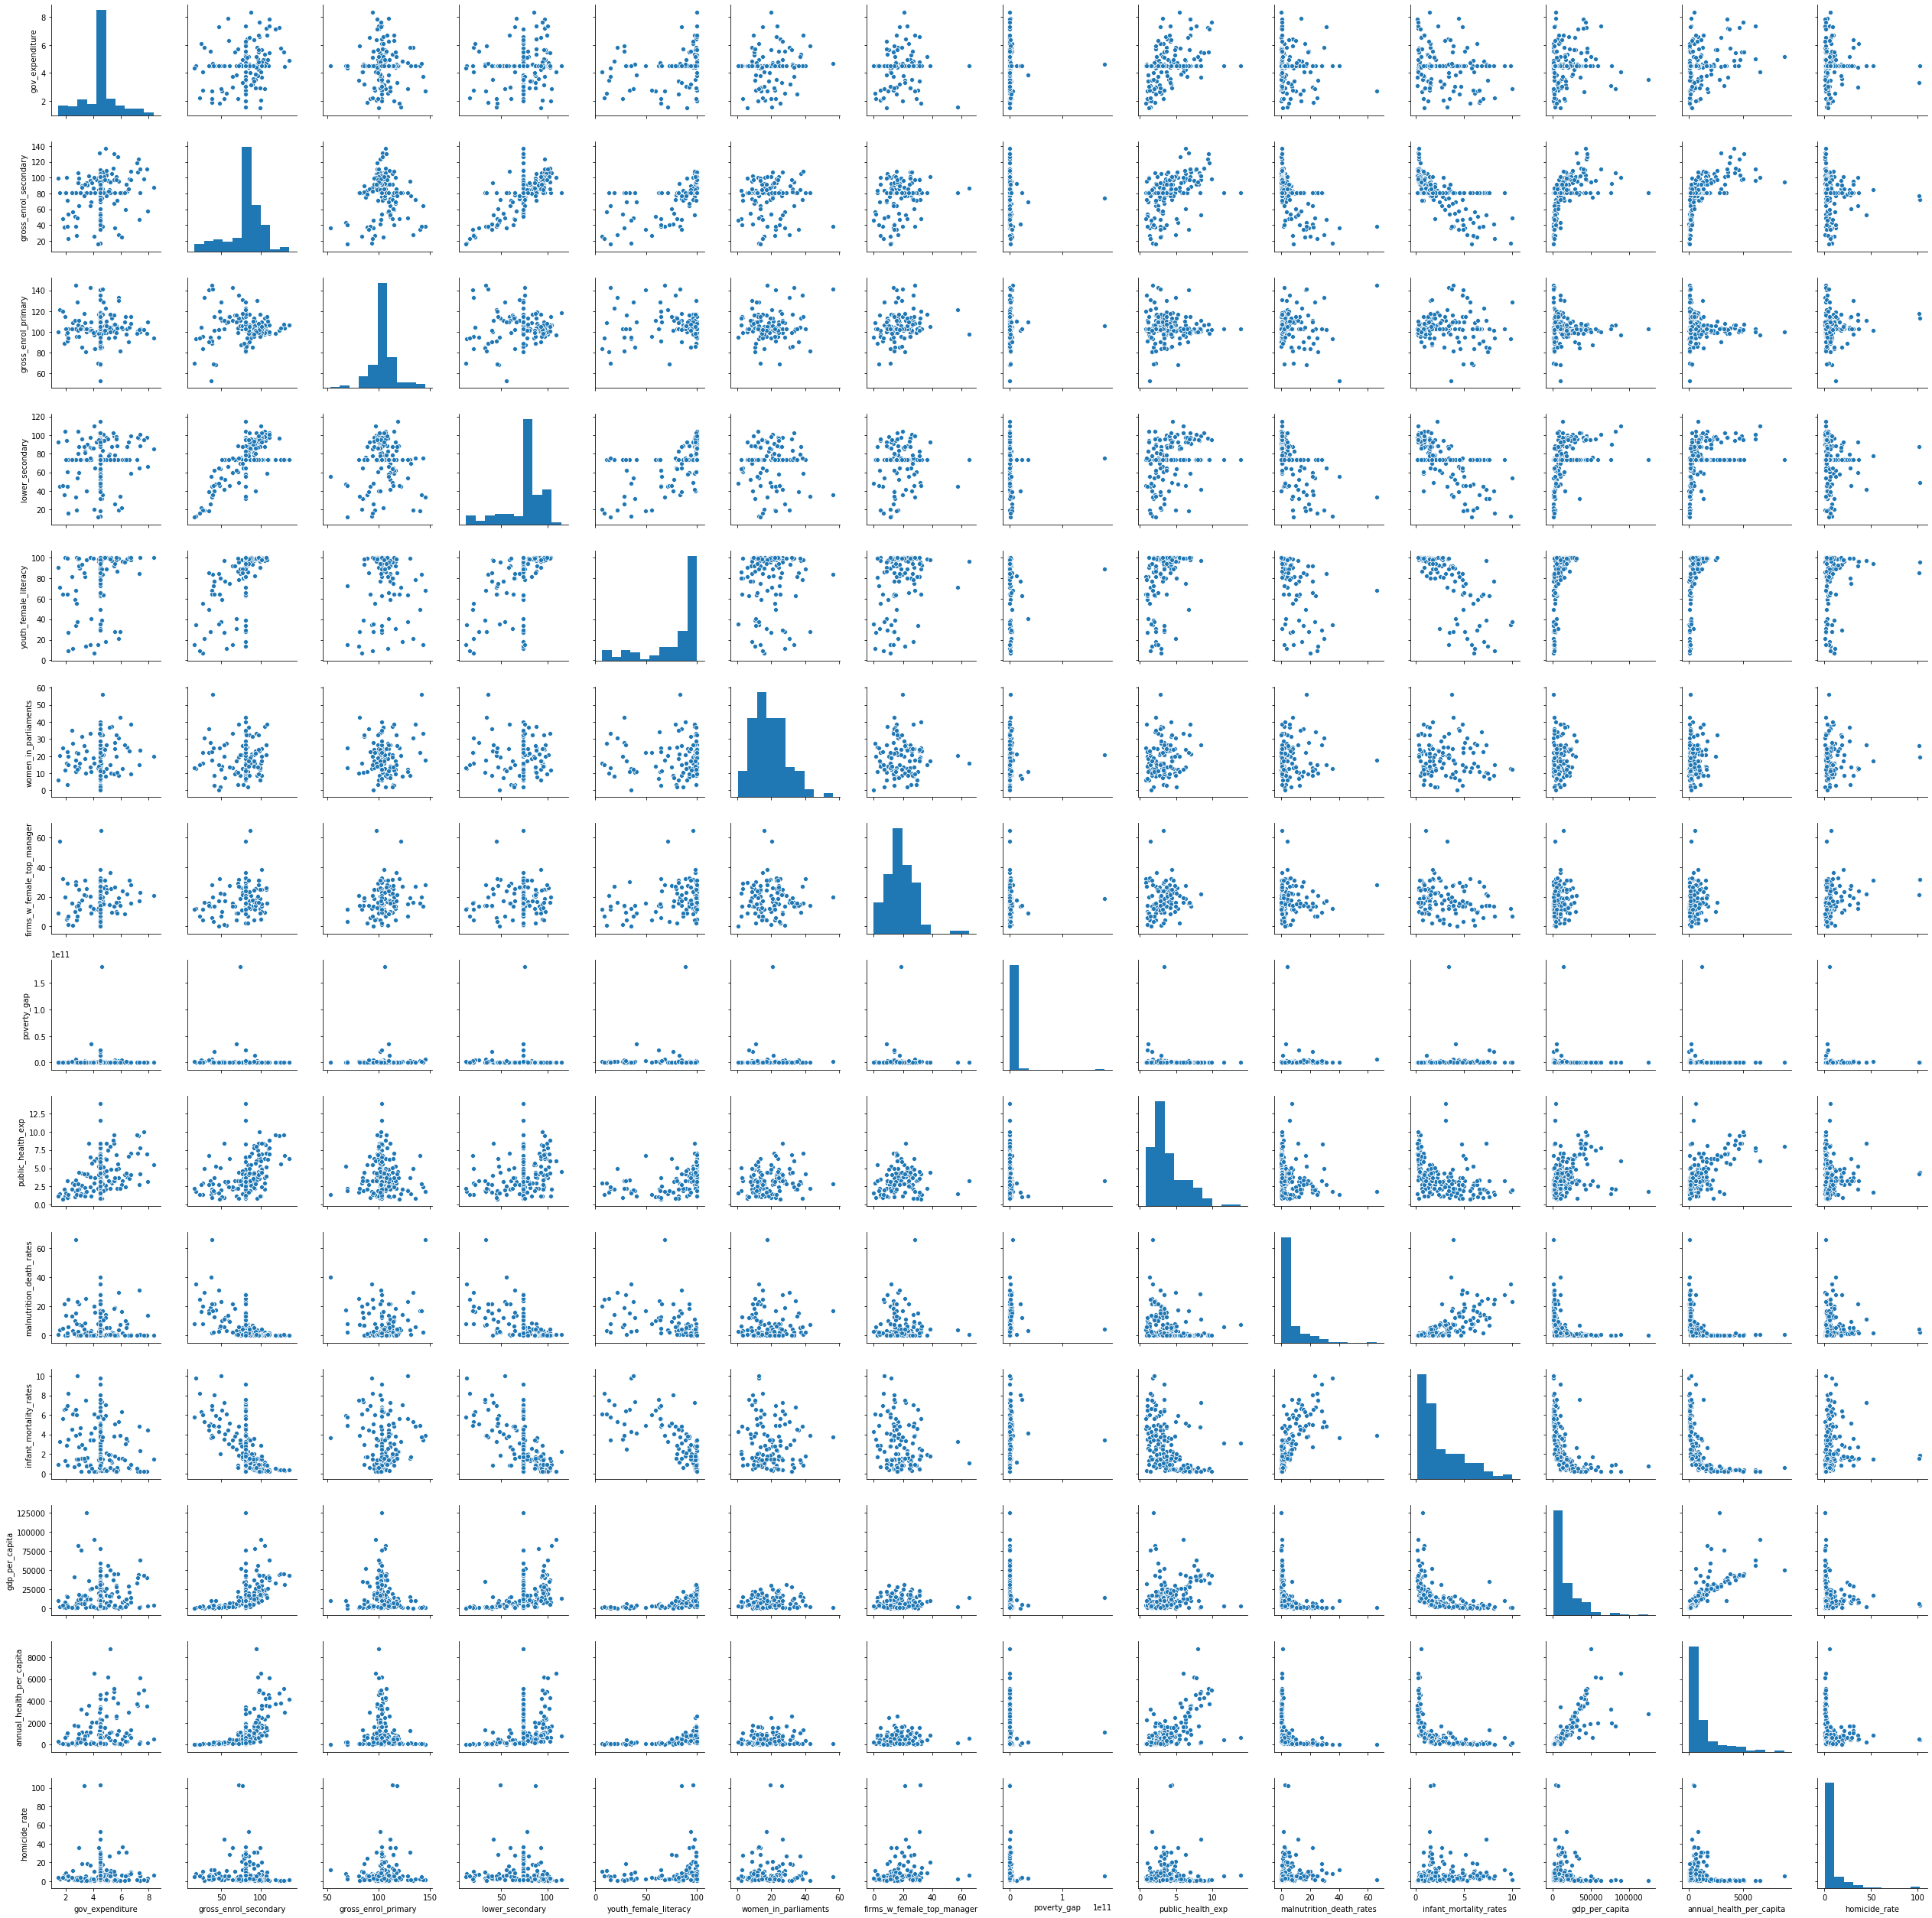

In [28]:
sns.pairplot(imputed_df)

#### WORKING ON SKEWED DATA
We could see that most of the attributes are right-skewed. One approach we could do is to perform log-transformation to normalize distribution.

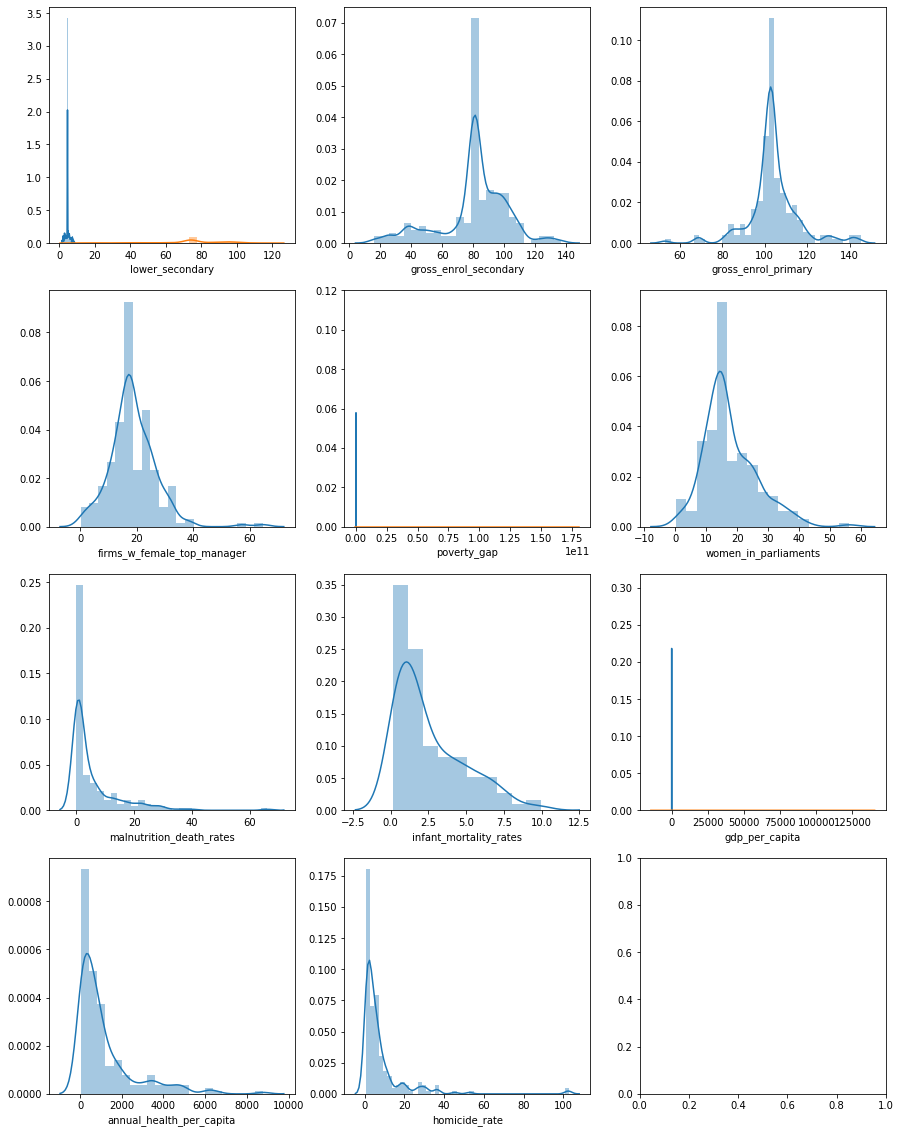

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for i, column in enumerate(imputed_df.columns):
    sns.distplot(imputed_df[column],ax=axes[i//4,i%3])

In [127]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in imputed_df.columns if imputed_df[c].dtype in numerics]:
    imputed_df[c] = np.log10(imputed_df[c])

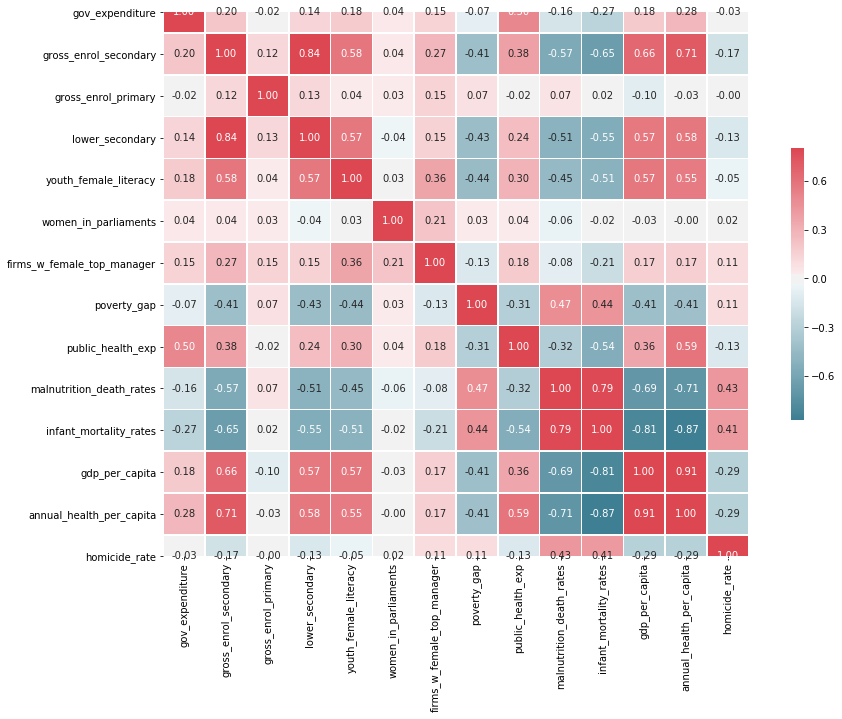

In [128]:
def correlation_heatmap(data):
    fig, ax = plt.subplots(figsize=(15,10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(data.corr(), cmap=cmap, vmax=.8, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
    plt.show();
    
correlation_heatmap(imputed_df)

In [61]:
imputed_df[imputed_df['poverty_gap'] < 30000]

,gov_expenditure,gross_enrol_secondary,gross_enrol_primary,lower_secondary,youth_female_literacy,women_in_parliaments,firms_w_female_top_manager,poverty_gap,public_health_exp,malnutrition_death_rates,infant_mortality_rates,gdp_per_capita,annual_health_per_capita,homicide_rate
0,0.402160,1.753409,2.037142,1.868727,1.046994,1.442480,-0.154902,7.788909,0.465467,0.530293,0.784617,3.264646,2.205118,1.058651
1,0.655399,1.907454,2.013398,1.868727,1.800594,1.532754,1.130334,9.165364,0.329869,1.375189,0.831230,3.778144,2.348781,0.567512
2,0.655399,1.967274,2.020297,1.973891,1.995724,1.195900,1.068186,6.645867,0.437069,-0.776415,-0.022276,4.015771,2.735604,0.394643
3,0.655399,1.907454,2.013398,1.868727,1.993602,1.186108,1.495544,7.788909,0.759444,-1.076398,-0.431798,4.017210,3.534851,-0.121757
4,0.655399,1.907454,2.006137,1.868727,1.995297,1.176091,1.249198,7.788909,0.406545,-0.782685,-0.154902,4.773926,3.299636,0.091527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.655399,1.933034,2.021826,2.010386,1.999207,1.255273,1.420781,5.198981,0.637254,0.625026,0.195900,3.751610,2.460374,0.498792
192,0.655399,1.664982,1.975087,1.682767,1.548730,-0.522879,-1.000000,7.788909,0.196350,0.393076,0.635484,3.579030,2.323544,0.485775
193,0.804251,1.963588,1.989582,1.868727,1.685572,1.521792,1.308564,9.243093,0.631068,0.707835,0.557507,4.086902,3.040376,1.489996
194,0.655399,1.907454,2.038265,1.743110,1.816403,1.060698,1.376577,9.479952,0.404213,1.330514,0.695482,3.545235,2.243268,0.792592


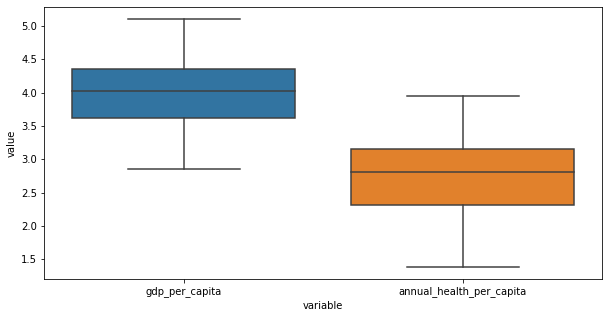

In [62]:
f, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(x=primary['country'].head(3), y=primary['gdp_per_capita'], data=primary)
sns.boxplot(x="variable", y="value", data=pd.melt(imputed_df[['gdp_per_capita', 'annual_health_per_capita']]))

**BOXPLOTS**

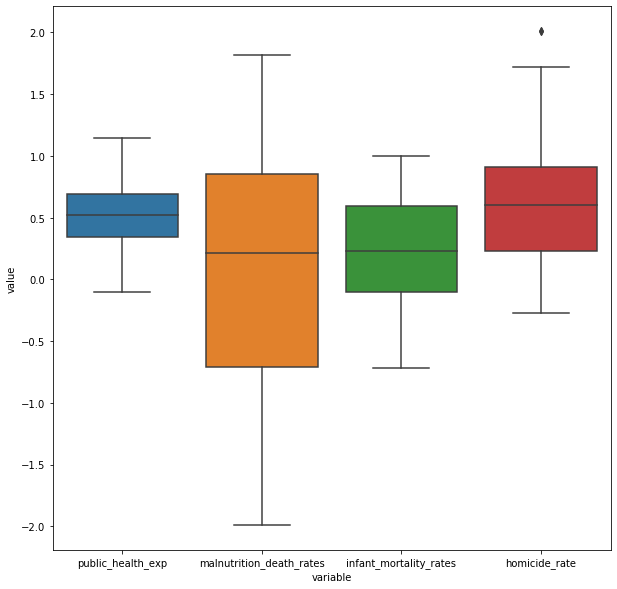

In [63]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(imputed_df[['public_health_exp', 'malnutrition_death_rates', 'infant_mortality_rates', 'homicide_rate']]))

In [130]:
imputed_df = imputed_df.replace([np.inf, -np.inf], 0)

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(imputed_df[['public_health_exp', 'malnutrition_death_rates', 'infant_mortality_rates', 'homicide_rate']]))

### (5) Model building without secondary data

#### LASSO REGRESSION

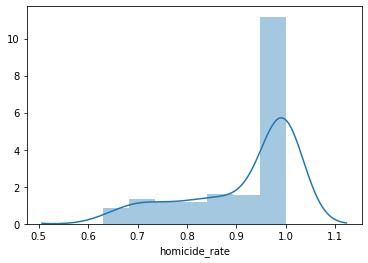

In [55]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

y_sig = sigmoid(imputed_df['homicide_rate'])
y_sig.describe()
sns.distplot(y_sig)

In [131]:
X = imputed_df.iloc[:,:-1] ## independent features
y = imputed_df.iloc[:,-1] ## dependent features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

lasso = Lasso()
alphas = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, alphas, scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train, y_train)
y_pred = lasso_regressor.predict(X_test)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.1770509876287095


In [132]:
r2_score(y_test, y_pred)

0.1281061067493191

#### DECISION TREE & RANDOM FORESTS

In [134]:
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print('Decision Tree R2 Score: {}'.format( r2_score(y_test, tree_model.predict(X_test)) ))
print('Random Forest R2 Score: {}'.format( r2_score(y_test, rf_model.predict(X_test)) ))

Decision Tree R2 Score: -0.16223420540102973
Random Forest R2 Score: 0.23657683017400544


### (6) Model evaluation

In [ ]:
print('Decision Tree R2 Score: {}'.format( r2_score(y_test, tree_model.predict(X_test)) ))
print('Decision Tree R2 Score: {}'.format( r2_score(y_test, tree_model.predict(X_test)) ))
print('Random Forest R2 Score: {}'.format( r2_score(y_test, rf_model.predict(X_test)) ))

In [166]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def evaluateModel(model, X, Y):
    kfold = KFold(n_splits=10, random_state=24)
    results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error')
    print("MAE: {} ({})".format(results.mean(), results.std()))
    
    results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    print("MSE: {} ({})".format(results.mean(), results.std()))

    results = cross_val_score(model, X, Y, cv=kfold, scoring='r2')
    print("R2: {} ({})".format(results.mean(), results.std()))


In [168]:
# evaluateModel(tree_model, y_test, tree_model.predict(X_test))
evaluateModel(lasso_regressor, X_train, y_train)

MAE: -0.3219834672380706 (0.07664169712919155)
MSE: -0.17787605285300917 (0.08308330659144356)
R2: 0.11046853799271523 (0.1726758690334808)


#### TUNING